# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" +city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kez
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | ambon
Processing Record 6 of Set 1 | qaisumah
Processing Record 7 of Set 1 | toliara
Processing Record 8 of Set 1 | beau vallon
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | nadym
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | awjilah
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | huejutla de reyes
Processing Record 17 of Set 1 | key west
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | pestovo
Processing Record 21 of Set 1 | bikenibeu village
Processing Record 22 of Set 1 | palangkaraya
Processing Recor

Processing Record 39 of Set 4 | tuzha
Processing Record 40 of Set 4 | saipan
Processing Record 41 of Set 4 | chinchilla
Processing Record 42 of Set 4 | juankoski
Processing Record 43 of Set 4 | tari
Processing Record 44 of Set 4 | seogwipo
City not found. Skipping...
Processing Record 45 of Set 4 | uturoa
Processing Record 46 of Set 4 | illizi
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | bislig
Processing Record 49 of Set 4 | kalmunai
Processing Record 0 of Set 5 | ancud
Processing Record 1 of Set 5 | san jose del cabo
Processing Record 2 of Set 5 | tilcara
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | brisas de zicatela
Processing Record 5 of Set 5 | pokhara
Processing Record 6 of Set 5 | el sauzal de rodriguez
Processing Record 7 of Set 5 | cadale
Processing Record 8 of Set 5 | atafu village
Processing Record 9 of Set 5 | green river
Processing Record 10 of Set 5 | novyy urgal
Processing Record 11 of Set 5 | yellowknife
Processing Reco

Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | luchegorsk
Processing Record 31 of Set 8 | aykol
City not found. Skipping...
Processing Record 32 of Set 8 | alliance
Processing Record 33 of Set 8 | ust-nera
Processing Record 34 of Set 8 | christchurch
Processing Record 35 of Set 8 | braganca
Processing Record 36 of Set 8 | castillejos
Processing Record 37 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 38 of Set 8 | cimin
Processing Record 39 of Set 8 | orcopampa
Processing Record 40 of Set 8 | susuman
Processing Record 41 of Set 8 | kerikeri
Processing Record 42 of Set 8 | sao jose de piranhas
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | say
Processing Record 45 of Set 8 | namsos
Processing Record 46 of Set 8 | kon tum
Processing Record 47 of Set 8 | raja
Processing Record 48 of Set 8 | inarajan village
Processing Record 49 of Set 8 | tsengel
Processing Record 0 of Set 9 | es castell
Processing Record 1 of Set 9

Processing Record 20 of Set 12 | idri
Processing Record 21 of Set 12 | prince albert
Processing Record 22 of Set 12 | yanam
Processing Record 23 of Set 12 | srebrenik
Processing Record 24 of Set 12 | stanthorpe
Processing Record 25 of Set 12 | massakory
Processing Record 26 of Set 12 | alma
Processing Record 27 of Set 12 | lyskovo
Processing Record 28 of Set 12 | mahibadhoo
Processing Record 29 of Set 12 | saint croix
Processing Record 30 of Set 12 | governor's harbour
City not found. Skipping...
Processing Record 31 of Set 12 | attapeu
Processing Record 32 of Set 12 | vanino
Processing Record 33 of Set 12 | dul'durga
Processing Record 34 of Set 12 | mont-joli
Processing Record 35 of Set 12 | ikwiriri
Processing Record 36 of Set 12 | amahai
Processing Record 37 of Set 12 | bel ombre
Processing Record 38 of Set 12 | saint-philippe
Processing Record 39 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 12 | los banos
Processing Record 41 of Set 12 | hartford
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kez,57.8979,53.7152,-26.95,100,23,3.04,RU,1704511782
1,kailua-kona,19.6406,-155.9956,79.50,71,0,5.75,US,1704511532
2,tiksi,71.6872,128.8694,-28.70,99,59,7.29,RU,1704511783
3,san patricio,28.0170,-97.5169,61.84,44,0,6.87,US,1704511784
4,ambon,-3.6954,128.1814,82.54,89,40,5.75,ID,1704511784


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kez,57.8979,53.7152,-26.95,100,23,3.04,RU,1704511782
1,kailua-kona,19.6406,-155.9956,79.50,71,0,5.75,US,1704511532
2,tiksi,71.6872,128.8694,-28.70,99,59,7.29,RU,1704511783
3,san patricio,28.0170,-97.5169,61.84,44,0,6.87,US,1704511784
4,ambon,-3.6954,128.1814,82.54,89,40,5.75,ID,1704511784


In [21]:
# Output File (CSV)

city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

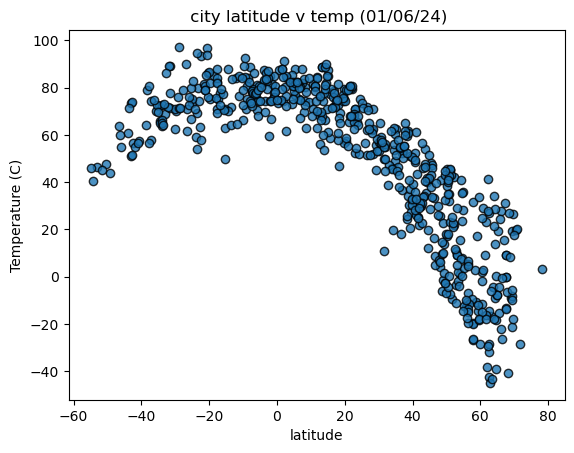

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker= "o", alpha= 0.8, label="Cities")

plt.title(f" city latitude v temp (%s)" % time.strftime("%x"))
plt.xlabel("latitude") 
plt.ylabel("Temperature (C)") 


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

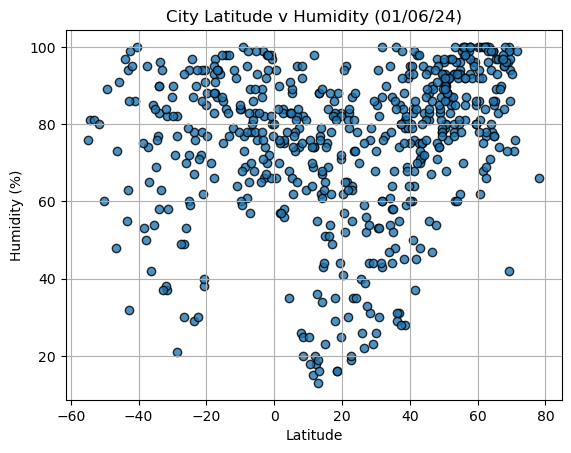

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

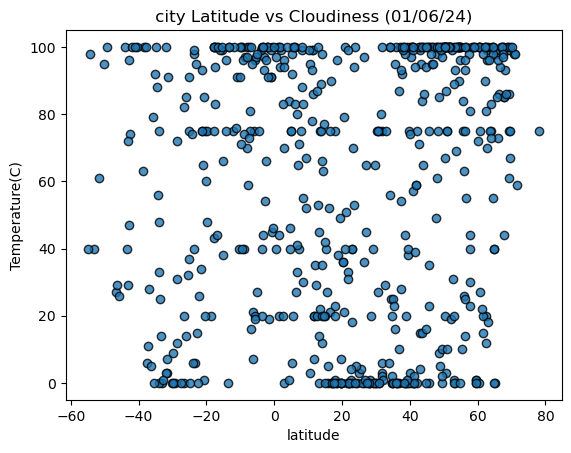

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label = "cities")
plt.title(f" city Latitude vs Cloudiness (%s) " % time.strftime("%x"))
plt.xlabel("latitude")
plt.ylabel("Temperature(C)")
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

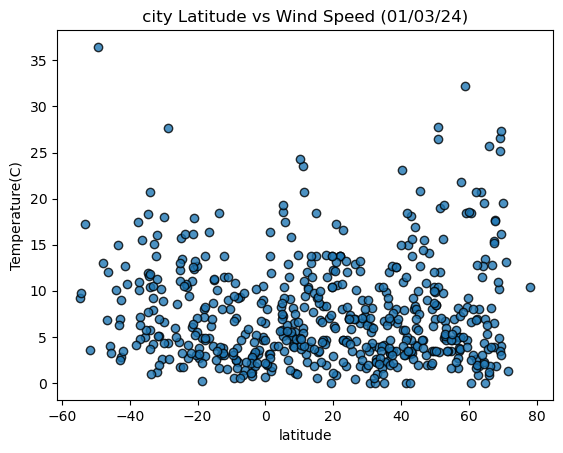

In [34]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label = "cities")
plt.title(f" city Latitude vs Wind Speed (%s) " % time.strftime("%x"))
plt.xlabel("latitude")
plt.ylabel("Temperature(C)")
plt.savefig("../output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kez,57.8979,53.7152,-26.95,100,23,3.04,RU,1704511782
1,kailua-kona,19.6406,-155.9956,79.50,71,0,5.75,US,1704511532
2,tiksi,71.6872,128.8694,-28.70,99,59,7.29,RU,1704511783
3,san patricio,28.0170,-97.5169,61.84,44,0,6.87,US,1704511784
5,qaisumah,28.3112,46.1273,51.76,76,0,4.61,SA,1704511593


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ambon,-3.6954,128.1814,82.54,89,40,5.75,ID,1704511784
6,toliara,-23.3500,43.6667,79.65,76,6,2.57,MG,1704511786
7,beau vallon,-20.4189,57.6953,86.22,94,75,0.00,MU,1704511786
8,port-aux-francais,-49.3500,70.2167,43.63,89,100,39.91,TF,1704511787
14,waitangi,-43.9535,-176.5597,60.82,97,100,3.00,NZ,1704511570


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7756362096870278


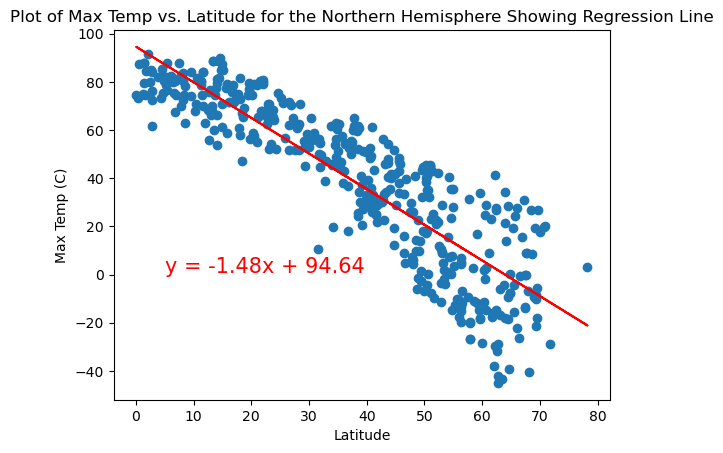

In [12]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Plot of Max Temp vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.31085010553728587


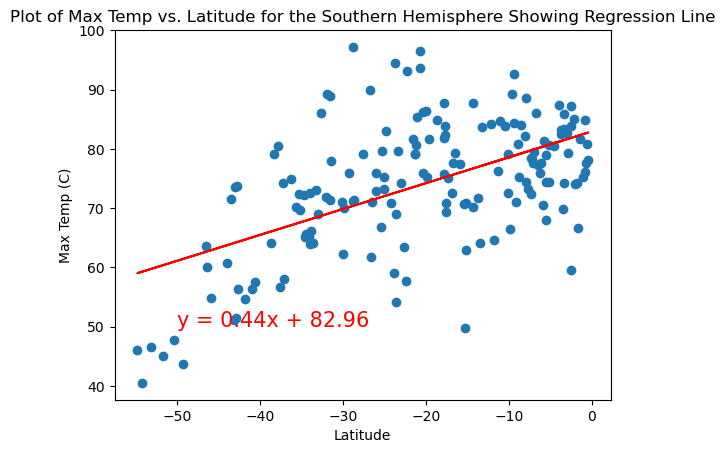

In [14]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50.0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Plot of Max Temp vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The plots of Latitude vs Max Temperature for cities in the northern and southern hemispheres confirm the trend observed in the plot of Latitude vs Max Temperature for all cities in the dataset. For cities in the northern hemisphere, latitude >= 0, the slope is 0.76  that indicates a decreasing trend in max temperature as the latitude moves closer to 0. On the other hand, for cities in the southern hemisphere, the slope is 0.31 that indicates an increasing trend in max temperature as the latitude moves further away from 0. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20985495796047135


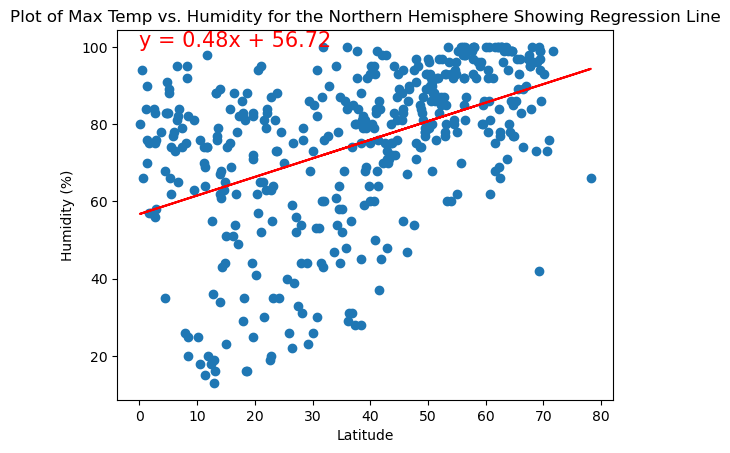

In [15]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.0,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Plot of Max Temp vs. Humidity for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06006566567387755


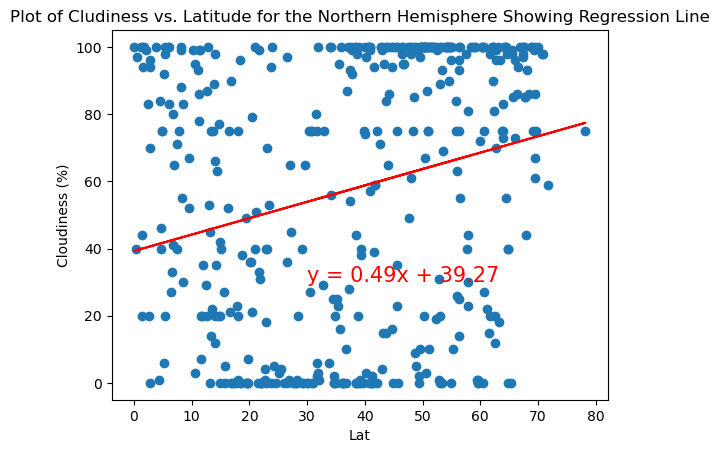

In [16]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30.0,30.0),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.title("Plot of Cludiness vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06251847068890541


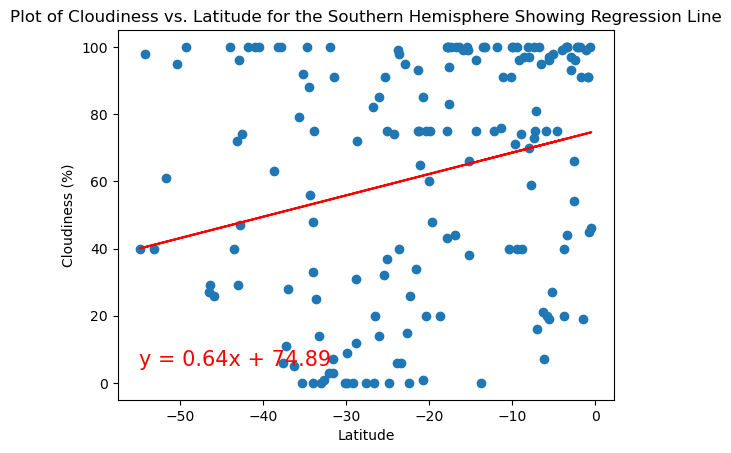

In [17]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.0,5.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Plot of Cloudiness vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00044906758353143686


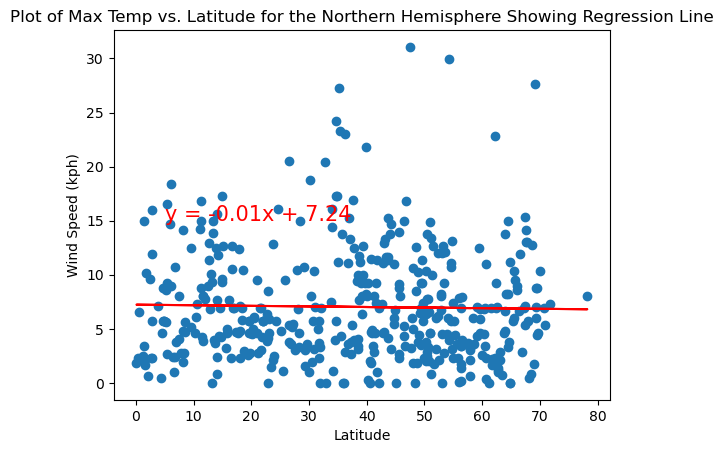

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,15.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("Plot of Max Temp vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0900876084435863


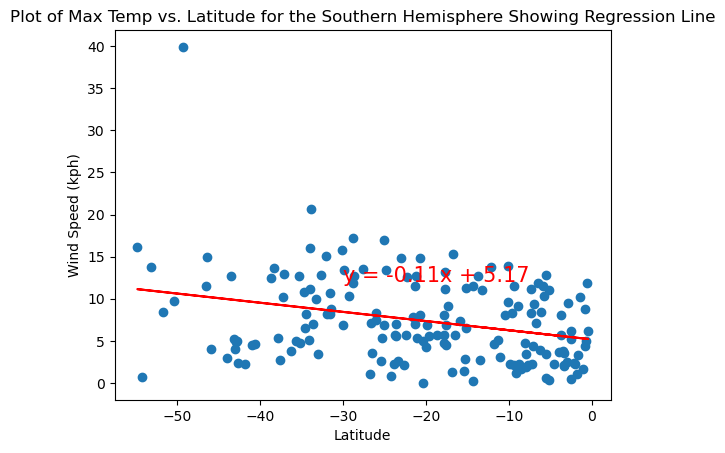

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30.0,12.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("Plot of Max Temp vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The relation between wind speed and latitude is very unique, with decrease of latitude, the wind speed is also decreasing as you can see in above scatterplot.